In [1]:
import numpy as np
import joblib
import pandas as pd
from causallearn.search.ScoreBased.GES import ges
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.pyplot as plt
from causallearn.score.LocalScoreFunction import local_score_cv_general
from sklearn.preprocessing import StandardScaler
from parallel_ges_cv import ParallelGESCV

In [2]:
df = pd.read_csv("encoded_clean_data3.csv")

df = df.iloc[:, 1:-17]
df = df.apply(pd.to_numeric, errors="coerce")
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.apply(lambda col: col.fillna(col.mean()), axis=0)
df = df.dropna(axis=1, how="all")
df = df.dropna(axis=0, how="any")
# df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

In [3]:
df1 = df.sample(frac=0.01, random_state=42)

features = [
    "physical_status", "Length", "LACE", "Comorbidity", "age", "BUN",
    "NIBP_MAP", "E_origin", "WBC", "HR", "admission_location", "insurance",
    "NIBP_DIA", "Acuity", "Hgb", "NIBP_SYS", "Glucose", "SpO2", "readmitted"
]

df1 = df1[features]
var_names1 = df1.columns.tolist()

In [4]:
model1 = ParallelGESCV(kfold=3, lambda_=0.01, n_jobs=-1)
record = model1.fit(df1.to_numpy(), var_names1)

Running GES search with causal-learn...


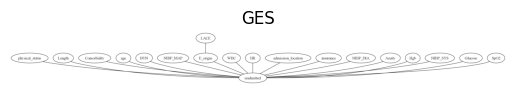

In [7]:
joblib.dump(model1, "saved_models/model_ges.pkl")
# model1 = joblib.load("saved_models/model_ges.pkl")
# record = model1.fit(df1.to_numpy(), var_names1)

pydot_graph = GraphUtils.to_pydot(record, labels=var_names1)
pydot_graph.write_png('figures/ges_result.png') 
img = plt.imread("figures/ges_result.png")
plt.imshow(img)
plt.axis('off')
plt.title("GES")
plt.show()

In [16]:
df2 = df.sample(frac=0.05, random_state=42)

features2 = [
    "physical_status", "Length", "LACE", "Comorbidity", "age", "BUN",
    "NIBP_MAP", "E_origin", "WBC", "readmitted"
]

df2 = df2[features2]
var_names2 = df2.columns.tolist()

In [18]:
model2 = ParallelGESCV(kfold=3, lambda_=0.01, n_jobs=-1)
record2 = model2.fit(df2.to_numpy(), var_names2)

Running GES search with causal-learn...


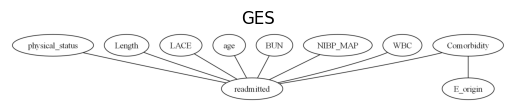

In [26]:
joblib.dump(model2, "saved_models/model_ges2.pkl")
# model2 = joblib.load("saved_models/model_ges2.pkl")
# record2 = model2.fit(df2.to_numpy(), var_names2)

pydot_graph = GraphUtils.to_pydot(record2, labels=var_names2)
pydot_graph.write_png('figures/ges_result2.png')
img = plt.imread("figures/ges_result2.png")
plt.imshow(img)
plt.axis('off')
plt.title("GES")
plt.show()

In [20]:
df3 = df.sample(frac=0.02, random_state=42)

features3 = [
    "physical_status", "Length", "LACE", "Comorbidity", "age", "readmitted"
]

df3 = df3[features3]
var_names3 = df3.columns.tolist()

In [21]:
model3 = ParallelGESCV(kfold=3, lambda_=0.01, n_jobs=32)
record3 = model3.fit(df3.to_numpy(), var_names3)

Running GES search with causal-learn...


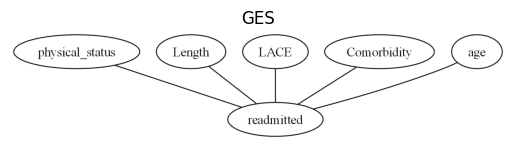

In [27]:
joblib.dump(model3, "saved_models/model_ges3.pkl")
# model3 = joblib.load("saved_models/model_ges3.pkl")
# record3 = model3.fit(df3.to_numpy(), var_names3)

pydot_graph = GraphUtils.to_pydot(record3, labels=var_names3)
pydot_graph.write_png('figures/ges_result3.png')
img = plt.imread("figures/ges_result3.png")
plt.imshow(img)
plt.axis('off')
plt.title("GES")
plt.show()